In [121]:
!pip install seaborn
!pip install dataframe_image

You should consider upgrading via the 'C:\Users\I\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\I\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [165]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report, roc_auc_score
from sklearn.preprocessing import LabelBinarizer
import seaborn as sns
import dataframe_image as dfi
import numpy as np
import scipy.stats as stats


In [166]:
DETAIL_MAP = ["cont0 - 주제의 명료성", "cont1 - 설명의 구체성", "cont3 - 사고의 창의성",
              "exp0 - 문법의 정확성", "exp1 - 단어 사용의 적절성", "exp2 - 문장 표현의 탄력성",
              "org0 - 문단 간 구조의 적절성", "org1 - 문단 내 구조의 적절성", "org2 - 구조의 일관성", "org3 - 분량의 적절성"]

CATEGORY = "본인의 성격"
VAL_PATH = f"preprocess_data/{CATEGORY}_val.xlsx"
RESULT_PATH = f"./result/data/{CATEGORY}_result.xlsx"

DIR_PATH = f"./result/score/{CATEGORY}"

In [167]:
DF_VAL = pd.read_excel(VAL_PATH)
DF_RESULT = pd.read_excel(RESULT_PATH)

In [168]:
# plt 한글깨짐 방지
plt.rc('font', family='Malgun Gothic')

df_label = DF_VAL
df_preds = DF_RESULT



In [169]:
df_scatter = pd.DataFrame()
df_temp = df_label.drop(df_label.columns[0], axis=1)

In [170]:
df_scatter["label"] = df_temp.sum(axis=1)
df_scatter["pred"] = df_preds.sum(axis=1)

C:\Users\I\AppData\Local\Temp\ipykernel_3980\964516984.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_scatter["pred"] = df_preds.sum(axis=1)


In [171]:
df_scatter

,label,pred
0,27,23
1,22,21
2,24,26
3,25,22
4,21,21
...,...,...
108,29,29
109,28,27
110,22,29
111,21,27


In [172]:
test = df_scatter["label"]
preds = df_scatter["pred"]
score_dict = {}

In [173]:
preds_df = pd.DataFrame(preds)
preds_df = preds_df.rename(columns={'pred': 'label'})

In [174]:
test_df = pd.DataFrame(test)
test_df

,label
0,27
1,22
2,24
3,25
4,21
...,...
108,29
109,28
110,22
111,21


In [175]:
df_scatter

,label,pred
0,27,23
1,22,21
2,24,26
3,25,22
4,21,21
...,...,...
108,29,29
109,28,27
110,22,29
111,21,27


In [176]:
df_scatter.corr(method='pearson')

,label,pred
label,1.000000,0.514057
pred,0.514057,1.000000


In [177]:
df_scatter.corr(method='kendall')

,label,pred
label,1.000000,0.382357
pred,0.382357,1.000000


In [178]:
df_scatter.corr(method='spearman')

,label,pred
label,1.000000,0.510592
pred,0.510592,1.000000


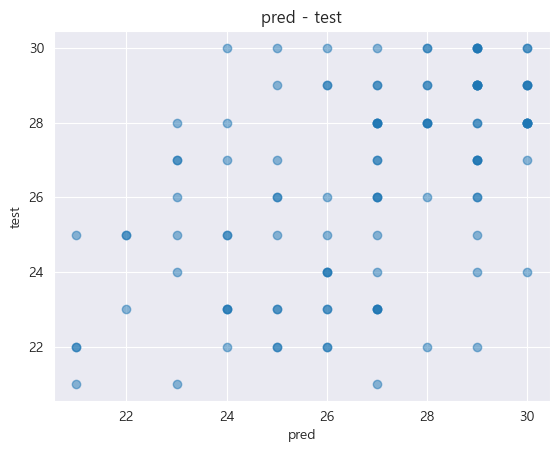

In [179]:
plt.scatter(preds_df, test_df, alpha=0.5)
plt.title('pred - test')
plt.xlabel('pred')
plt.ylabel('test')
plt.show()

In [181]:
stats.pearsonr(np.squeeze(preds_df), np.squeeze(test_df))

PearsonRResult(statistic=0.5140565138802731, pvalue=5.761889994140267e-09)

In [ ]:
# for detail in DETAIL_MAP:
#     test = df_label[detail]
#     preds = df_preds[detail]

# classification_report
report = classification_report(test, preds, output_dict=True)

report_df = pd.DataFrame(report)
dfi.export(report_df, f'{DIR_PATH}/result_report_{CATEGORY}_all.png', max_cols=-1, max_rows=-1)

In [ ]:
labels = np.concatenate((pd.unique(test), pd.unique(preds)))
labels = np.unique(labels)
labels = np.sort(labels)

In [ ]:
cm = confusion_matrix(test, preds, labels=labels)
ax = sns.heatmap(cm, annot=True, cmap='YlGn_r')
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
# plt.title(model_names[detail])
plt.title('총점')
plt.savefig(f'{DIR_PATH}/result_confusion_matrix_{CATEGORY}_all.png')
print(f"{CATEGORY}+all cm SAVE")
plt.clf()

# score
score_dict["accuracy_score"] = '{:.4f}'.format(accuracy_score(test, preds))
score_dict["f1_score(micro)"] = '{:.4f}'.format(f1_score(test, preds, average="micro"))
score_dict["f1_score(macro)"] = '{:.4f}'.format(f1_score(test, preds, average="macro"))
score_dict["f1_score(weighted)"] = '{:.4f}'.format(f1_score(test, preds, average="weighted"))

label_binarizer = LabelBinarizer().fit(test)
test = label_binarizer.transform(test)
preds = label_binarizer.transform(preds)
auc = roc_auc_score(
    test,
    preds,
    multi_class="ovr",
    average="micro",
)
score_dict["auc-ovr(mircro)"] = '{:.4f}'.format(auc)

score_df = pd.DataFrame(score_dict, index=[0])
score_df = score_df.style.set_table_styles([
    {'selector': 'th',
     'props': [('text-align', 'center')]},
    {'selector': 'td',
     'props': [('text-align', 'center')]}
])
dfi.export(score_df, f'{DIR_PATH}/result_score_{CATEGORY}_all.png', max_cols=-1, max_rows=-1)
print(f"{CATEGORY}+all score SAVE")